In [19]:
import pandas as pd
import numpy as np

In [20]:
data = pd.read_csv("covid.csv")

In [21]:
data.head()

,no,pc,wbc,mc,ast,bc,ldh,diagnosis
0,1,Low,Low,Low,High,Normal,Normal,True
1,2,Low,Low,Normal,High,Normal,High,True
2,3,Low,High,Normal,High,Normal,Normal,False
3,4,Low,High,Normal,High,High,Normal,True
4,5,Low,Normal,High,High,Normal,Normal,False


In [22]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
pc_encoded=le.fit_transform(data['pc'].values)
wbc_encoded=le.fit_transform(data['wbc'].values)
mc_encoded=le.fit_transform(data['mc'].values)
ast_encoded=le.fit_transform(data['ast'].values)
bc_encoded=le.fit_transform(data['bc'].values)
ldh_encoded=le.fit_transform(data['ldh'].values)
Y=le.fit_transform(data['diagnosis'].values)


In [23]:
X=np.array(list(zip(pc_encoded,wbc_encoded,mc_encoded,ast_encoded,bc_encoded,ldh_encoded)))
X
Y

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0])

In [37]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, roc_curve
model = MultinomialNB()

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y)


In [26]:
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)


In [27]:
print("Accuracy:",accuracy_score(Y_test, y_pred))


Accuracy: 0.8571428571428571


In [28]:
print("\nReport")
print(classification_report(Y_test,y_pred))



Report
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.83      0.91         6

    accuracy                           0.86         7
   macro avg       0.75      0.92      0.79         7
weighted avg       0.93      0.86      0.87         7



In [29]:
lr_probs = model.predict_proba(X_test)

In [30]:
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

In [39]:
lr_fpr, lr_tpr, _=roc_curve(Y_test, lr_probs)

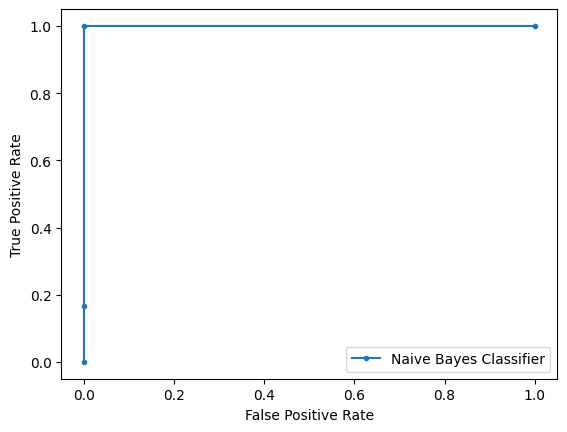

In [36]:
from matplotlib import pyplot
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Naive Bayes Classifier')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()